# Imports

In [1]:
from sklearn import preprocessing, neighbors, naive_bayes, neural_network, svm, tree
from sklearn.metrics import confusion_matrix,  roc_curve, auc
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.decomposition import PCA
from scipy import interp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
from sklearn.model_selection import cross_validate

# Reading Data

In [2]:
import pandas as pd
df = pd.read_csv(r'F:\2nd page\72. Machine Learning Approaches for Detection and Diagnosis of Parkinson’s Disease\Source codeS\Data/pd_speech_features.txt')
df.drop(['id'], 1, inplace=True)
print(df)

     gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0         1  0.85247  0.71826  0.57227        240               239   
1         1  0.76686  0.69481  0.53966        234               233   
2         1  0.85083  0.67604  0.58982        232               231   
3         0  0.41121  0.79672  0.59257        178               177   
4         0  0.32790  0.79782  0.53028        236               235   
..      ...      ...      ...      ...        ...               ...   
751       0  0.80903  0.56355  0.28385        417               416   
752       0  0.16084  0.56499  0.59194        415               413   
753       0  0.88389  0.72335  0.46815        381               380   
754       0  0.83782  0.74890  0.49823        340               339   
755       0  0.81304  0.76471  0.46374        340               339   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  ...  \
0            0.008064            0.000087       0.00218      0.000018

C:\Users\DLK\AppData\Local\Temp\ipykernel_3824\3097422731.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


In [3]:
import numpy as np
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

C:\Users\DLK\AppData\Local\Temp\ipykernel_3824\715816409.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['class'], 1))


# Normalizing Data

In [4]:
Z = np.divide((X - X.mean(0)), X.std(0))

# PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 168)
Z_PCA = pca.fit_transform(Z)

In [6]:
print(Z_PCA.shape)

(756, 168)


# Building the models

In [7]:
# KNN
from sklearn import neighbors, naive_bayes,svm,neural_network,tree
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,VotingClassifier
# knn1 = neighbors.KNeighborsClassifier(n_neighbors=7)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# Naive Bayes
gnb = naive_bayes.GaussianNB()
gnb_bagging = BaggingClassifier(naive_bayes.GaussianNB(), max_samples = 0.5, max_features = 1.0, n_estimators = 20)

# Support Vector Machine
svmc = svm.SVC(kernel='linear', probability=True,
                     random_state=1)

# Neural Network
nn = neural_network.MLPClassifier(
#                                     activation = 'logistic', 
#                                    solver = 'sgd', 
#                                    max_iter=3000, 
#                                    learning_rate_init = 0.001, 
#                                    momentum = 0.9, 
#                                    epsilon = 1e-04, 
                                   hidden_layer_sizes = (200), 
                                   random_state = 42)
# Decision Tree
dt = tree.DecisionTreeClassifier(random_state = 42)
dt_boost = AdaBoostClassifier(random_state = 42, base_estimator=tree.DecisionTreeClassifier(random_state = 42, max_depth=1), n_estimators= 100, learning_rate = 1)
boost = AdaBoostClassifier(n_estimators= 100)
vote = VotingClassifier(estimators=[('dt', dt_boost), ('knn', knn), ('nn', nn), ('gnb', gnb)],
                          voting='soft', weights=[1, 1, 1, 1])


# Testing using cross validation

In [8]:
# from sklearn.model_selection import KFold, StratifiedKFold

# model = knn
# scores = cross_validate.cross_val_score(model, Z, y, cv=5, scoring='accuracy')
# y_pred = cross_validate.cross_val_predict(model, Z, y, cv=5)

# acc = scores.mean()
# conf_mat = confusion_matrix(y, y_pred)

In [9]:
#print(acc)
# print(conf_mat)

## Accuracy, ROC/AUC, and confuson matrix

C:\Users\DLK\AppData\Local\Temp\ipykernel_3824\3993714666.py:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DLK\AppData\Local\Temp\ipykernel_3824\3993714666.py:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DLK\AppData\Local\Temp\ipykernel_3824\3993714666.py:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DLK\AppData\Local\Temp\ipykernel_3824\3993714666.py:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DLK\AppData\Local\Temp\ipykernel_3824\3993714666.py:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy

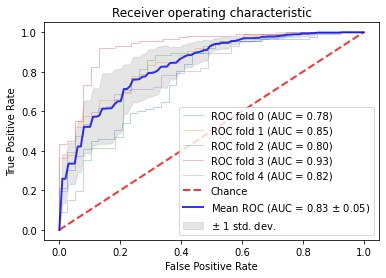

In [10]:
folds = 5
cv = StratifiedKFold(n_splits=folds)

# Classifiers: 
# Decision Tree: dt
# Decision Tree (with boosting): dt_boost
# MLP: nn
# Gaussian Naive Bayes: gnb
# KNN: knn

classifier = nn
inp = Z

acc = np.zeros(folds)
confm = np.zeros((2, 2))

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(inp, y):
    probas_ = classifier.fit(inp[train], y[train]).predict_proba(inp[test])
    # Compute accuracy
    y_pred = classifier.predict(inp[test])
    acc[i] = (y_pred == y[test]).mean()
    # Confusion matrix
    confm = confm + confusion_matrix(y[test], y_pred)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [11]:
'{:.2f}% +- {:.2f}%'.format(acc.mean() * 100, acc.std() * 100) 

'82.41% +- 2.96%'

In [12]:
cm = np.zeros((3,3))

In [13]:
cm[0:2, 0:2] = confm
cm[0,2] = (cm[0,0] / cm[0,0:2].sum())* 100
cm[1,2] = (cm[1,1] / cm[1,0:2].sum())* 100
cm[2,0] = (cm[0,0] / cm[0:2,0].sum())* 100
cm[2,1] = (cm[1,1] / cm[0:2,1].sum())* 100

In [14]:
display(HTML(tabulate.tabulate(cm, tablefmt='html')))

116,76,60.4167
57,507,89.8936
67.052,86.964,0
